In [1]:
import pandas as pd

In [2]:
boston = pd.read_csv("HousingData.csv")

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# fillna missing data

In [5]:
# fillna missing data
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
for col in boston.columns:
    if boston[col].dtype != 'object':
        boston.fillna({col: boston[col].mean()}, inplace=True)

In [8]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Check duplicated data

In [12]:
boston.duplicated().sum()

0

In [15]:
import seaborn as sns

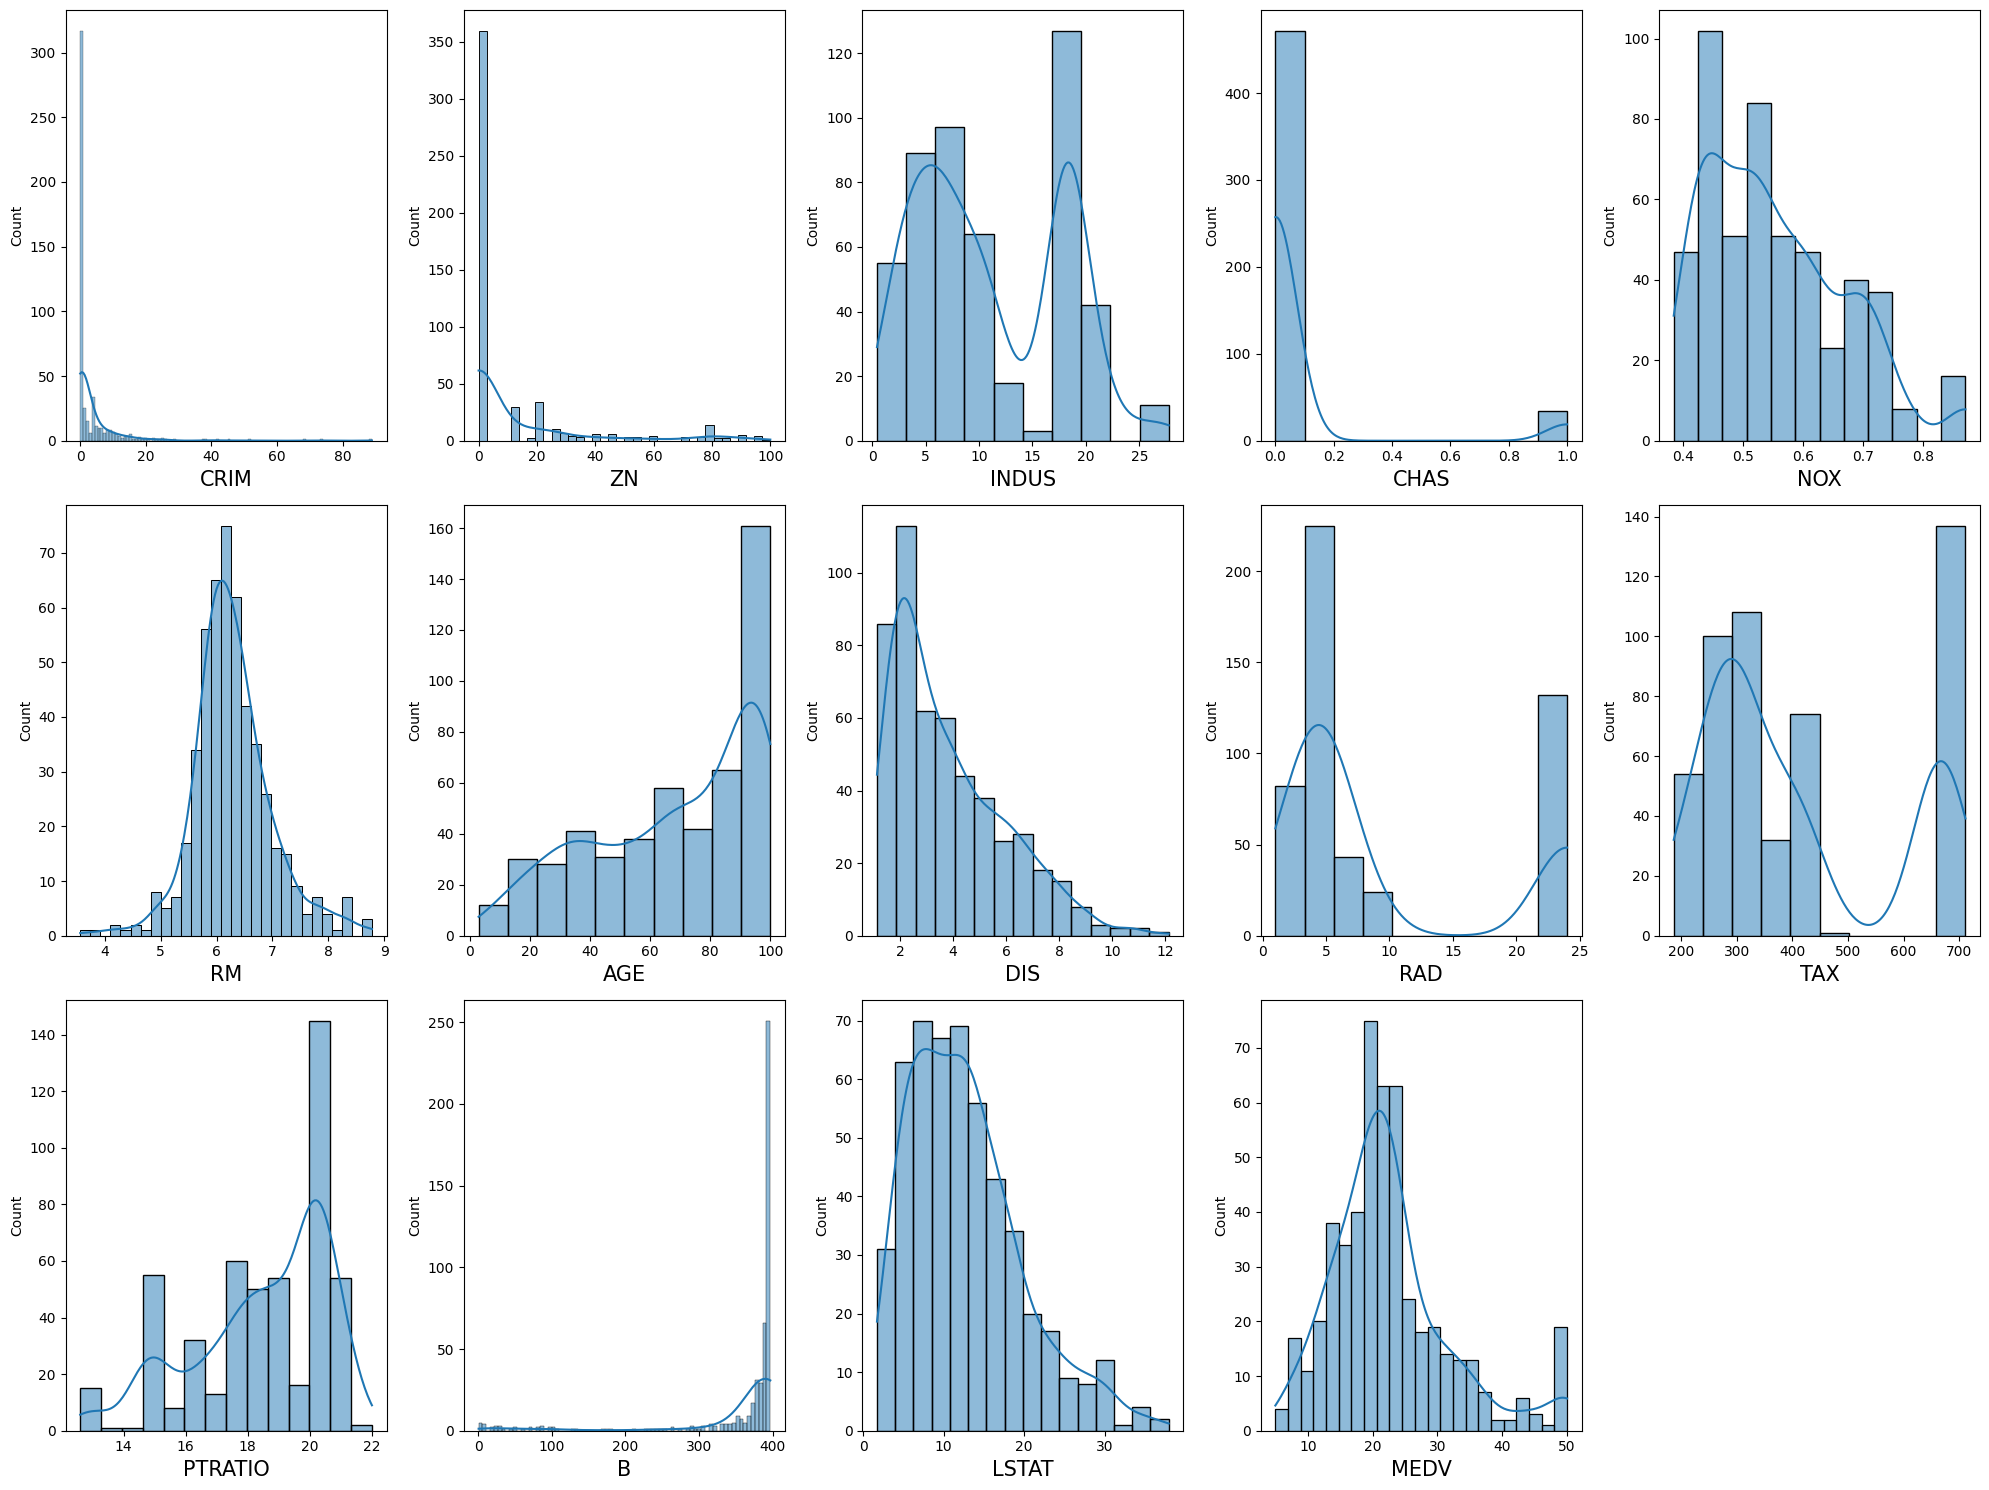

In [21]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in boston:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(boston[column],kde=True)
        plt.xlabel(column, fontsize = 15)
        plt.tight_layout()
        
    plotnumber += 1
plt.show()

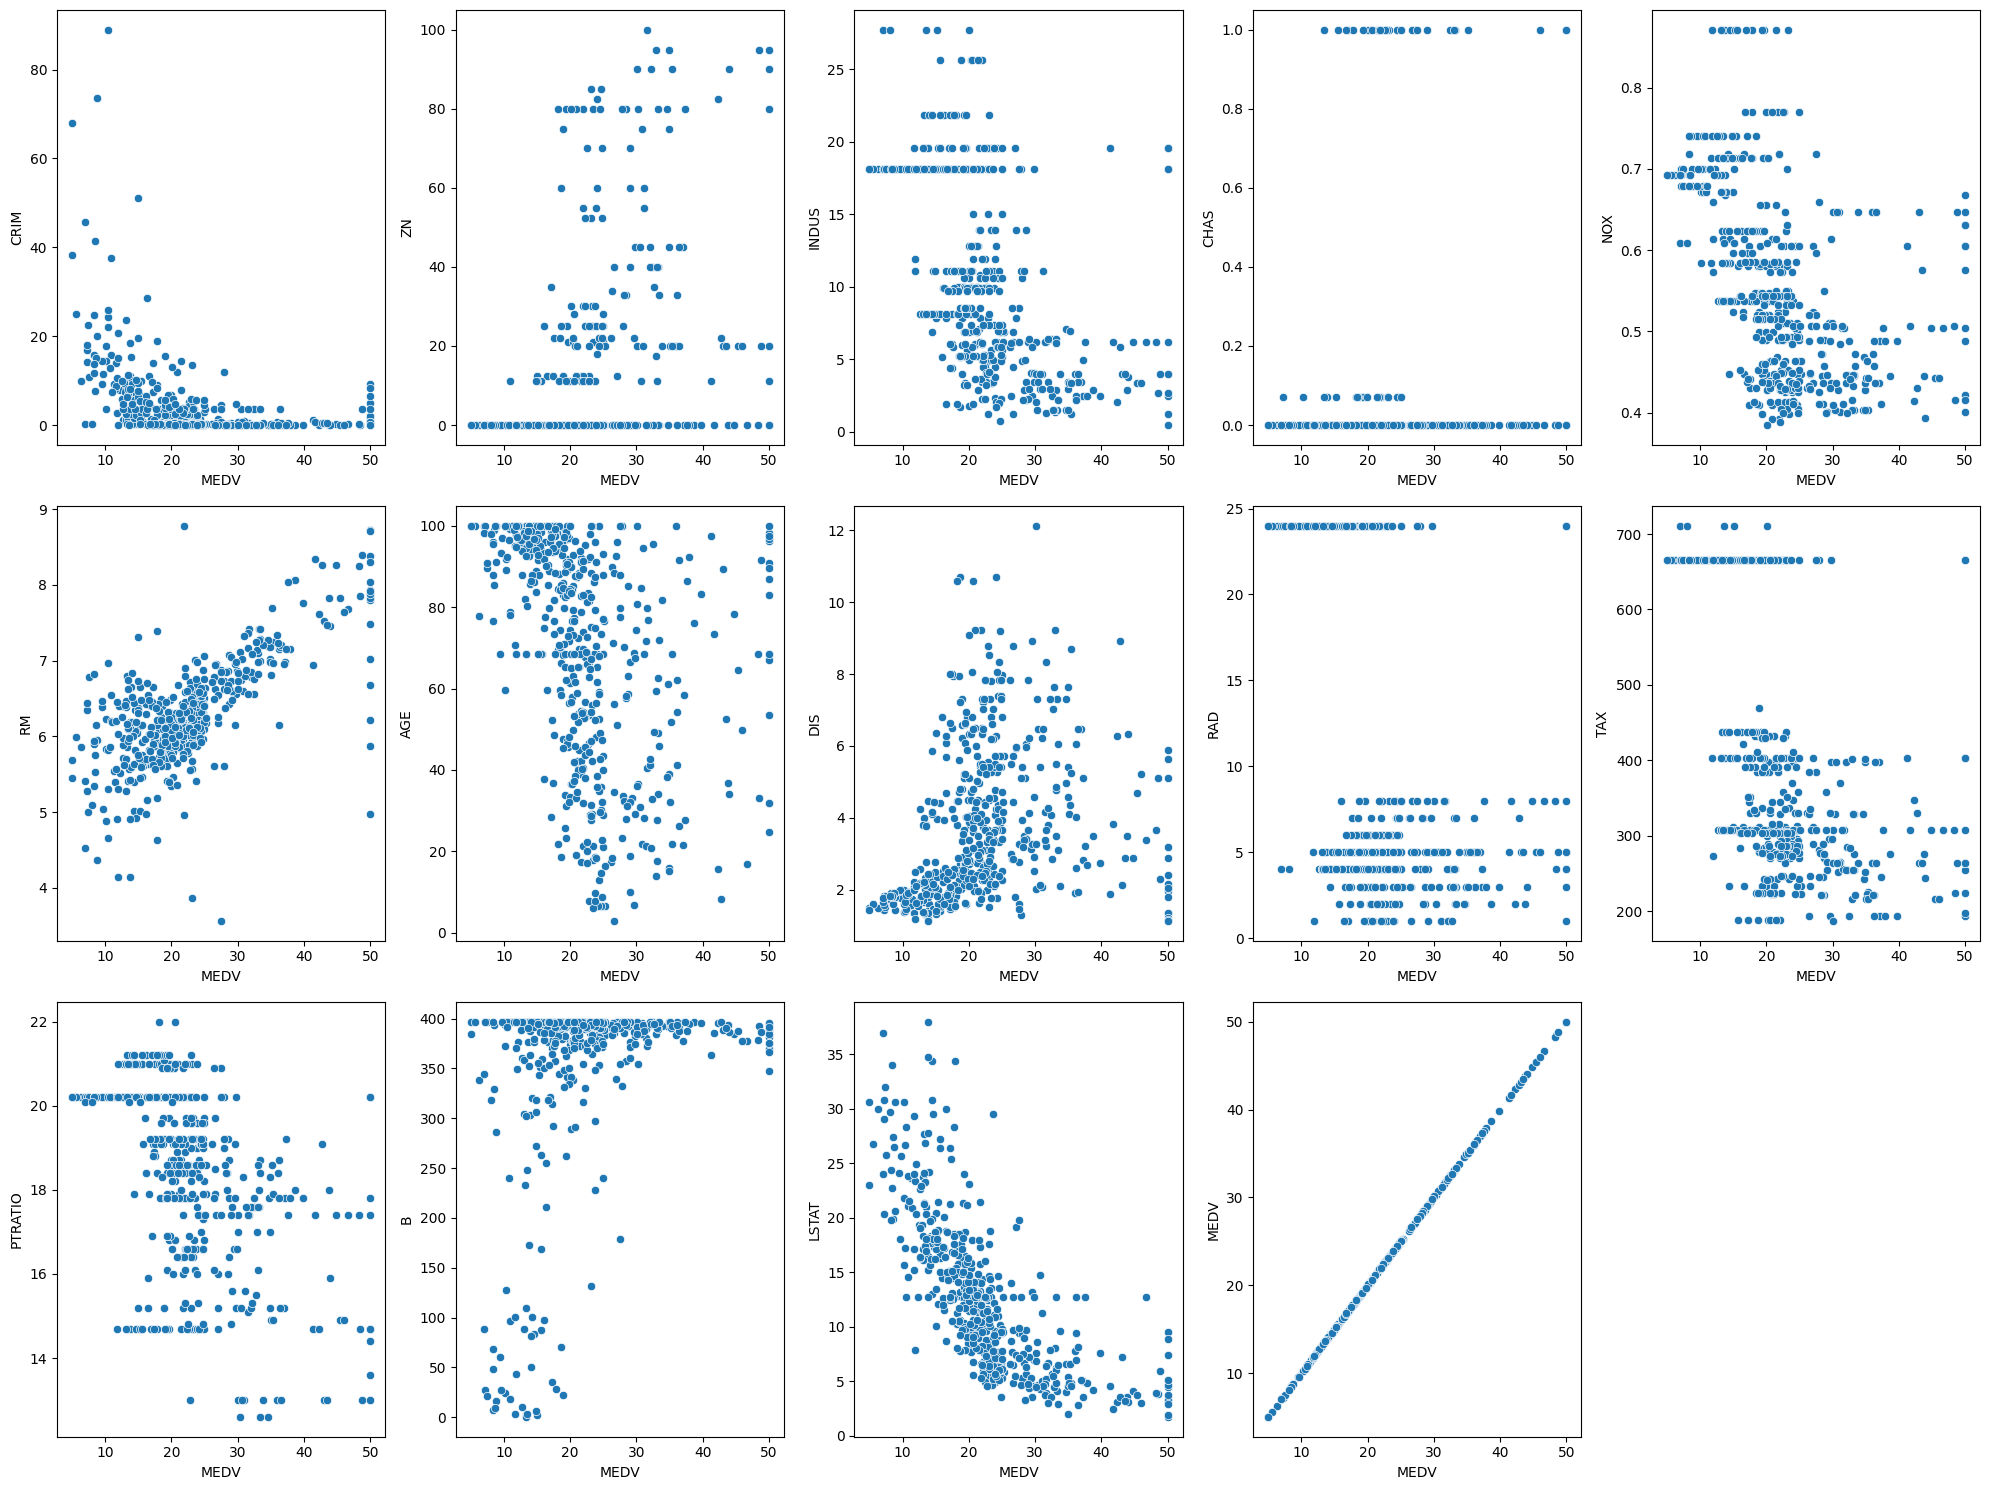

In [22]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in boston:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = boston['MEDV'], y = boston[column])
        
    plotnumber += 1
    plt.tight_layout()

plt.show()

looking for outliers using box plot

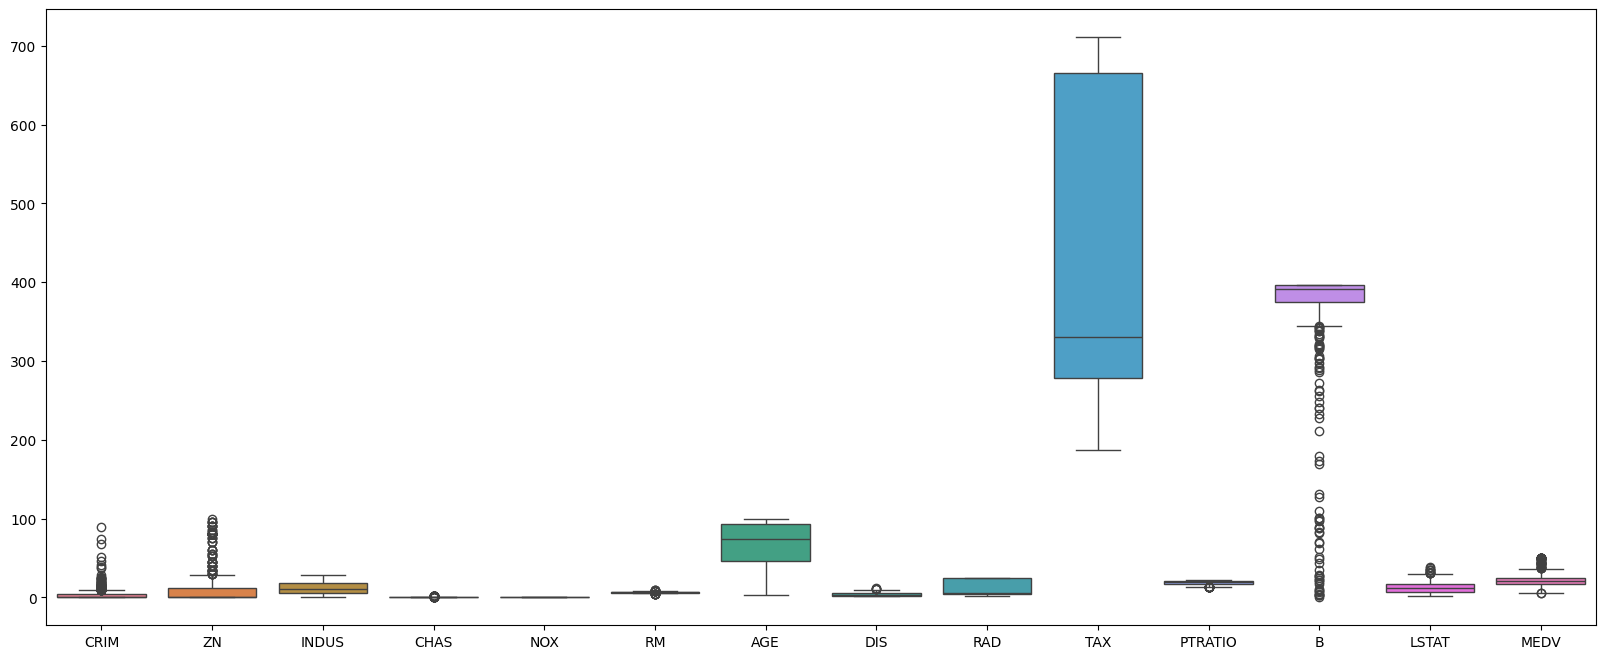

In [23]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = boston, width = 0.8)
plt.show()

To find the correlation between multiple variables

<Figure size 400x400 with 0 Axes>

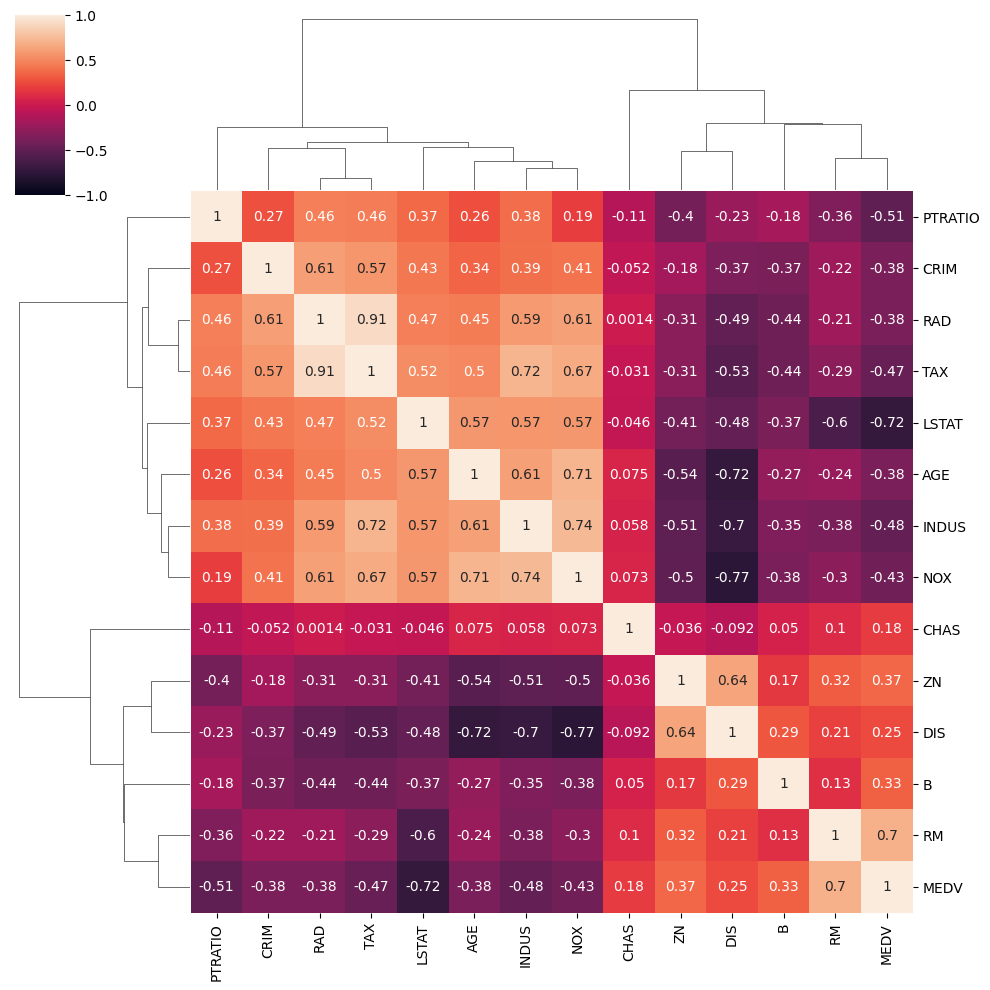

In [24]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(boston.corr(), vmin = -1, vmax = 1, annot = True)

TAX And RAD has the coreation of 0.91 so drop one of the feature to reduce overfitting of the model

In [25]:
boston = boston.drop("TAX", axis=1)

Dividing the dataset into Features and Target variable

In [33]:
# creating features and label variable

x = boston.iloc[:,:-1]
y = boston['MEDV']

In [34]:
print(boston.shape)
print(x.shape)
print(y.shape)

(506, 13)
(506, 12)
(506,)


In [35]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,12.715432


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
x_scaled

array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

Spliiting the dataset to train the model

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Defining function to check how different models behave with different datasets

In [40]:
def train_test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"For {model}")
    print("Train score : ", model.score(X_train, y_train))
    print("Test score : ", model.score(X_test, y_test))
    
    plt.figure(figsize = (10,5))
    sns.regplot(x=y_test,y=y_pred, line_kws=dict(color="r"))
    plt.title(f'{model}', fontsize = 20)
    print("-"*100)
    return

Importing differnt models

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor

Creating object of model so that we can easily train the model

In [48]:
m1 = LinearRegression()
m2 = RandomForestRegressor()
m3 = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2 )
m4 = SGDRegressor()

For LinearRegression()
Train score :  0.7390172111223937
Test score :  0.6480120993382023
----------------------------------------------------------------------------------------------------
For RandomForestRegressor()
Train score :  0.9728849253309731
Test score :  0.8813991198780001
----------------------------------------------------------------------------------------------------
For KNeighborsRegressor()
Train score :  0.8464299101103913
Test score :  0.6956056104720338
----------------------------------------------------------------------------------------------------
For SGDRegressor()
Train score :  0.738612120619172
Test score :  0.6493880579820983
----------------------------------------------------------------------------------------------------


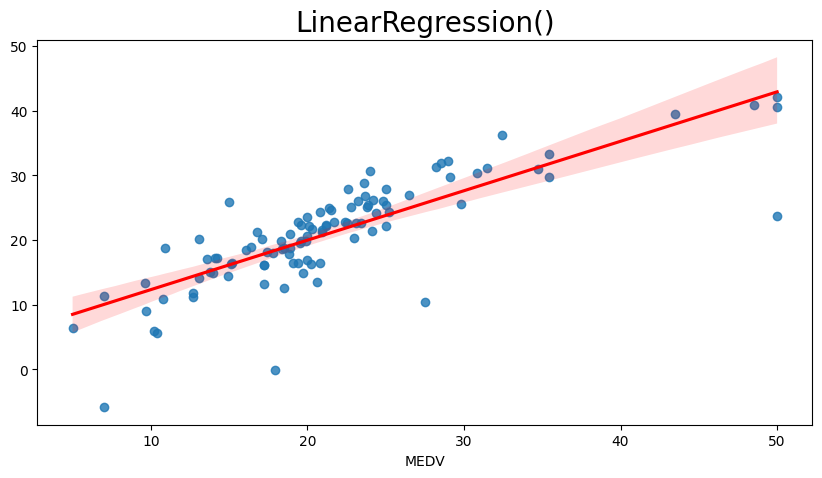

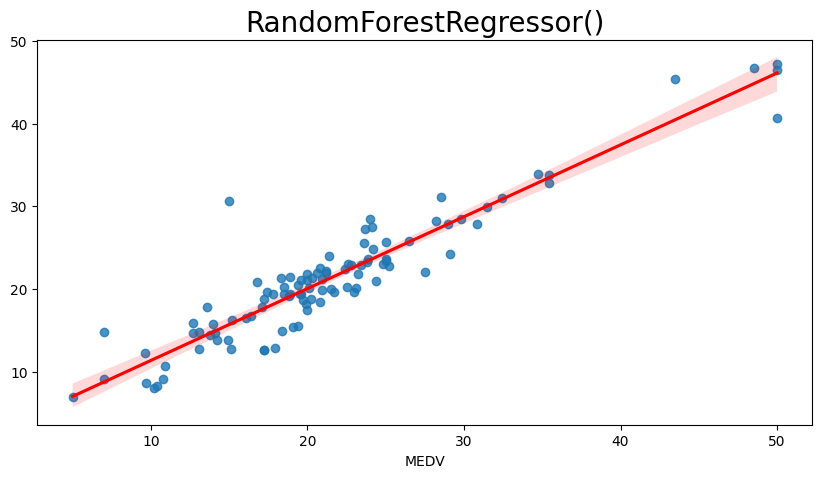

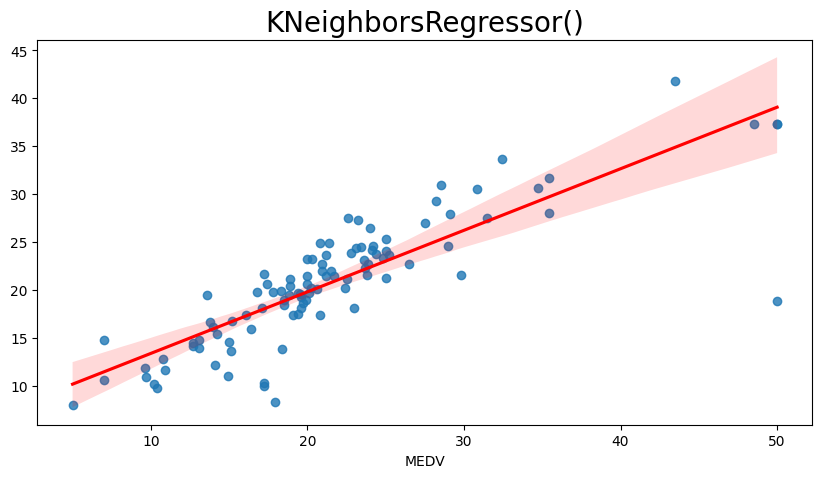

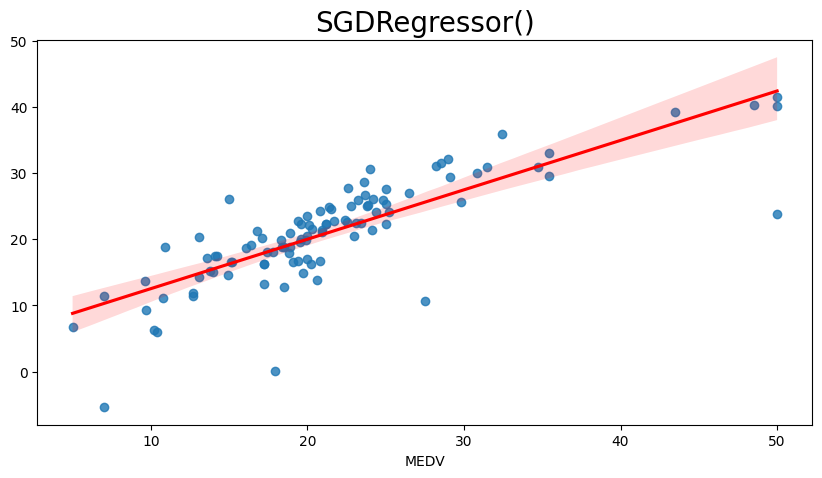

In [53]:
models = [m1, m2, m3, m4]

for model in models:
    train_test(model, x_train, x_test, y_train, y_test)